In [157]:
#import librery.

import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import warnings 
warnings.filterwarnings('ignore')

In [158]:
#load dataset.

df = pd.read_csv('netflix_titles.csv')

In [159]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [160]:
df.shape

(8807, 12)

In [161]:
#checking null values of data.

df.isnull().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

In [162]:
# fill null value columns by 'Unknown','mode'

df['director'].fillna('Unknown',inplace=True)
df['cast'].fillna('Unknown',inplace=True)
df['country'].fillna('unknown',inplace=True)
df['date_added'].fillna(df['date_added'].mode()[0],inplace=True)
df['rating'].fillna(df['rating'].mode()[0],inplace=True)
df['duration'].fillna(df['duration'].mode()[0],inplace=True)

In [163]:
# checking full informations of data.

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      8807 non-null   object
 4   cast          8807 non-null   object
 5   country       8807 non-null   object
 6   date_added    8807 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8807 non-null   object
 9   duration      8807 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [164]:
# Checking duplicates value in the data.

df.duplicated().sum()         # Here is no any duplicates Value.

0

In [165]:
# checking description of the data.here is only one column ('RElEASE_YEAR') is numeric.

df.describe()

,release_year
count,8807.000000
mean,2014.180198
std,8.819312
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2019.000000
max,2021.000000


In [166]:
df.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [167]:
# Let's calculate basic descriptive statistics for relevant columns
# Calculate mean,median,mode,range,standard deviation.


mean_values = df['release_year'].mean()
print('Mean_values:',mean_values)

median_values = df['release_year'].median()
print('Median_values:',median_values)

mode_values = df['release_year'].mode()[0]  
print('Mode_values:',mode_values)

range_values = df['release_year'].max() - df['release_year'].min()
print('Range_values:',range_values)

std_deviation_values = df['release_year'].std()
print('Std_deviation_values:',std_deviation_values)


Mean_values: 2014.1801975701146
Median_values: 2017.0
Mode_values: 2018
Range_values: 96
Std_deviation_values: 8.819312130834057


In [168]:
# Top Countries Producing Content:

df.country.value_counts().head(15)


country
United States     2818
India              972
unknown            831
United Kingdom     419
Japan              245
South Korea        199
Canada             181
Spain              145
France             124
Mexico             110
Egypt              106
Turkey             105
Nigeria             95
Australia           87
Taiwan              81
Name: count, dtype: int64

<Axes: ylabel='country'>

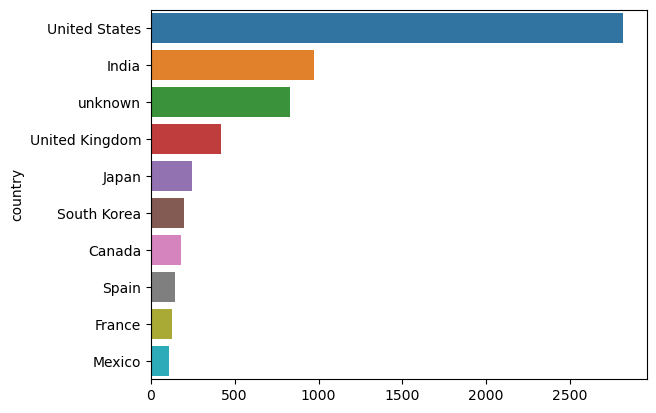

In [169]:
# Visualising content produced by top 10 countries

sns.barplot(y=df.country.value_counts().head(10).index, x=df.country.value_counts().head(10).values)

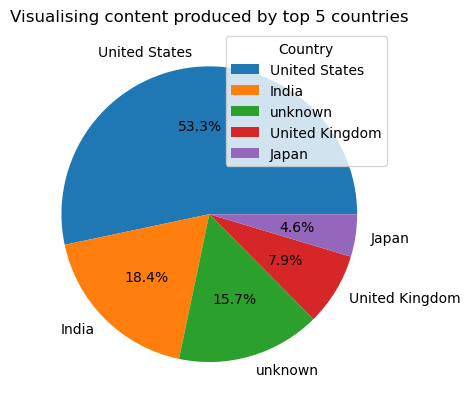

In [170]:
plt.pie(df.country.value_counts().head(5),labels=df.country.value_counts().head().index, autopct='%.1f%%')
plt.legend(loc='upper right', title="Country")
plt.title('Visualising content produced by top 5 countries')
plt.show()

In [171]:
# top produced content

df.rating.value_counts().head(10)

rating
TV-MA    3211
TV-14    2160
TV-PG     863
R         799
PG-13     490
TV-Y7     334
TV-Y      307
PG        287
TV-G      220
NR         80
Name: count, dtype: int64

Text(0, 0.5, 'Counts')

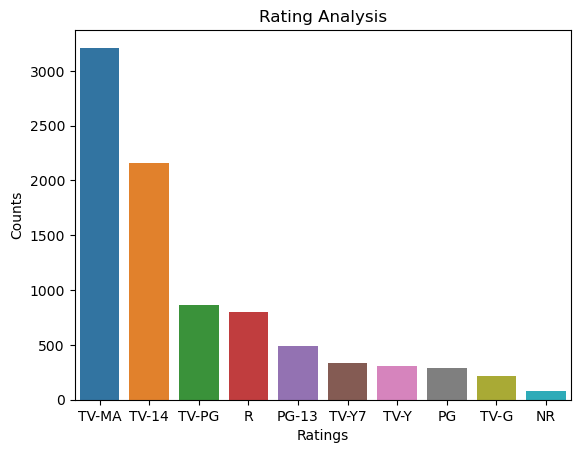

In [172]:
sns.barplot(y=df.rating.value_counts().head(10).values, x=df.rating.value_counts().head(10).index)
plt.title('Rating Analysis')
plt.xlabel('Ratings')
plt.ylabel('Counts')

In [173]:
s=df.groupby(['rating']).size().reset_index(name = 'counts')
px.pie(s, values = 'counts', names = 'rating', title = 'Distribution of  content ratings')

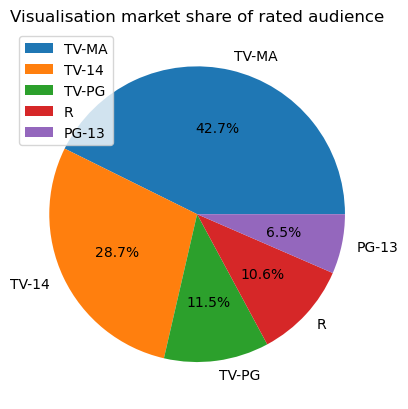

In [174]:
# Visualisation market share of rated audience

plt.pie(df.rating.value_counts().head(5), labels=df.rating.value_counts().head(5).index, autopct='%.1f%%')
plt.title('Visualisation market share of rated audience')
plt.legend(loc='upper left')
plt.show()

In [175]:
# show on the basis of type conten.in which two columns "Movie" , "TV Show".

df.type.value_counts()

type
Movie      6131
TV Show    2676
Name: count, dtype: int64

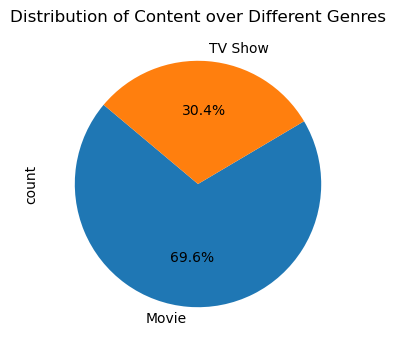

In [176]:
# visualization of type.

plt.figure(figsize=(6, 4))
df['type'].value_counts().plot(kind='pie', autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Content over Different Genres')
plt.show()

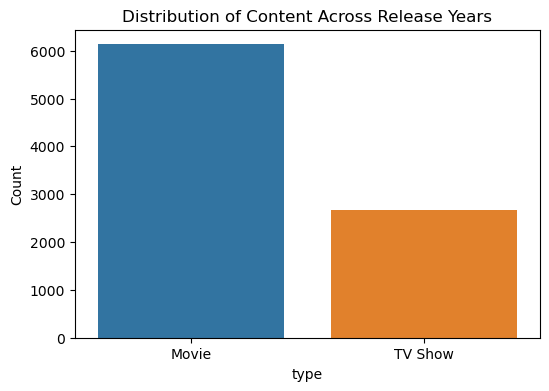

In [177]:
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='type')
plt.title('Distribution of Content Across Release Years')
plt.xlabel('type')
plt.ylabel('Count')
plt.show()

In [178]:
# Understanding data on the basis of duration

df.duration.value_counts().head(10)

duration
1 Season     1796
2 Seasons     425
3 Seasons     199
90 min        152
94 min        146
97 min        146
93 min        146
91 min        144
95 min        137
96 min        130
Name: count, dtype: int64

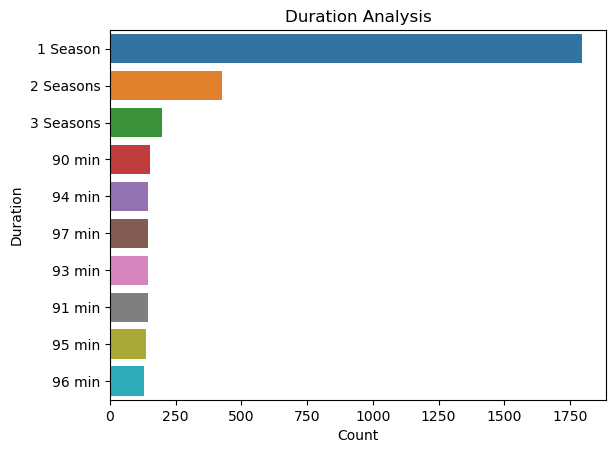

In [179]:
sns.barplot(y=df.duration.value_counts().head(10).index, x=df.duration.value_counts().head(10).values)
plt.title('Duration Analysis')
plt.xlabel('Count')
plt.ylabel('Duration')
plt.show()

In [180]:
#  India is rapidly growing market, we can see their trends in content

df[df.country=='India'].rating.value_counts().head()

rating
TV-14    550
TV-MA    248
TV-PG    134
TV-Y7     14
TV-G       9
Name: count, dtype: int64

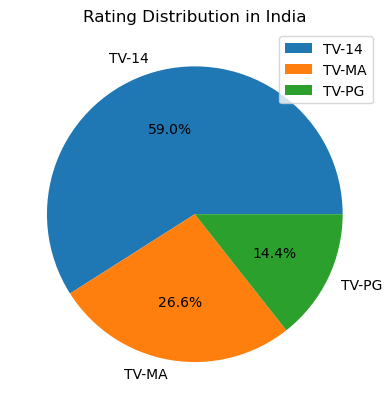

In [181]:
plt.pie(df[df.country=='India'].rating.value_counts().head(3), labels= df[df.country=='India'].rating.value_counts().head(3).index , autopct='%.1f%%')
plt.title('Rating Distribution in India')
plt.legend(loc='upper right')
plt.show()

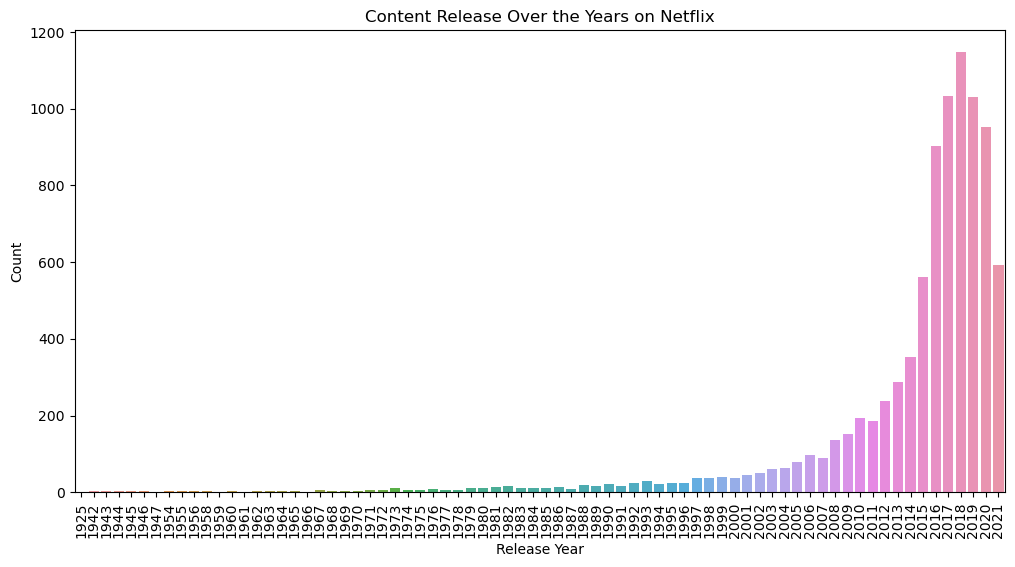

In [182]:
# showing data on the basis of release years 

plt.figure(figsize=(12, 6))
sns.countplot(x='release_year', data=df)

plt.title('Content Release Over the Years on Netflix')
plt.xlabel('Release Year')
plt.ylabel('Count')
plt.xticks(rotation=90)  # Rotate x-axis labels for better visibility
plt.show()

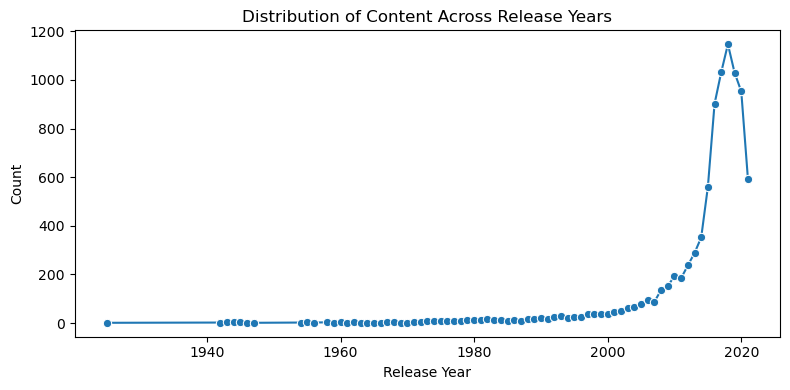

In [183]:
# visualize content count on the basis of  release year.

plt.figure(figsize=(8, 4))
sns.lineplot(data=df.groupby('release_year').size().reset_index(name='count'), x='release_year', y='count', marker='o')
plt.title('Distribution of Content Across Release Years')
plt.xlabel('Release Year')
plt.ylabel('Count')
plt.tight_layout()
plt.show()